<a href="https://www.kaggle.com/code/ramezmaged/predicting-price-of-used-cars?scriptVersionId=166447774" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense , InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [6]:
data.shape

(1000, 12)

In [7]:
data.columns.values.tolist()

['v.id',
 'on road old',
 'on road now',
 'years',
 'km',
 'rating',
 'condition',
 'economy',
 'top speed',
 'hp',
 'torque',
 'current price']

In [8]:
sns.pairplot(data[['v.id',
 'on road old',
 'on road now',
 'years',
 'km',
 'rating',
 'condition',
 'economy',
 'top speed',
 'hp',
 'torque',
 'current price']],diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

In [9]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data)

tf.Tensor(

[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02

  3.513180e+05]

 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01

  2.850015e+05]

 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01

  2.153860e+05]

 ...

 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01

  4.058710e+05]

 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02

  7.439800e+04]

 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01

  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [10]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(

[[7.180000e+02 6.943630e+05 7.516590e+05 6.000000e+00 1.118440e+05

  5.000000e+00 3.000000e+00 1.500000e+01 1.440000e+02 8.400000e+01

  9.900000e+01 2.737070e+05]

 [7.310000e+02 6.402050e+05 7.508160e+05 2.000000e+00 8.738300e+04

  5.000000e+00 8.000000e+00 1.000000e+01 1.970000e+02 8.100000e+01

  1.150000e+02 3.641555e+05]

 [8.040000e+02 6.244330e+05 8.752970e+05 6.000000e+00 1.417330e+05

  1.000000e+00 5.000000e+00 1.500000e+01 1.550000e+02 7.400000e+01

  1.130000e+02 1.808915e+05]

 [2.800000e+02 6.202140e+05 8.996110e+05 7.000000e+00 1.240620e+05

  4.000000e+00 5.000000e+00 8.000000e+00 1.860000e+02 8.500000e+01

  1.250000e+02 2.575655e+05]

 [7.610000e+02 5.115500e+05 7.505050e+05 5.000000e+00 1.308100e+05

  2.000000e+00 1.000000e+01 1.500000e+01 1.760000e+02 5.400000e+01

  8.900000e+01 1.565130e+05]], shape=(5, 12), dtype=float32)


In [11]:
x = tensor_data[:,3:-1]
print(x[:5])

tf.Tensor(

[[6.00000e+00 1.11844e+05 5.00000e+00 3.00000e+00 1.50000e+01 1.44000e+02

  8.40000e+01 9.90000e+01]

 [2.00000e+00 8.73830e+04 5.00000e+00 8.00000e+00 1.00000e+01 1.97000e+02

  8.10000e+01 1.15000e+02]

 [6.00000e+00 1.41733e+05 1.00000e+00 5.00000e+00 1.50000e+01 1.55000e+02

  7.40000e+01 1.13000e+02]

 [7.00000e+00 1.24062e+05 4.00000e+00 5.00000e+00 8.00000e+00 1.86000e+02

  8.50000e+01 1.25000e+02]

 [5.00000e+00 1.30810e+05 2.00000e+00 1.00000e+01 1.50000e+01 1.76000e+02

  5.40000e+01 8.90000e+01]], shape=(5, 8), dtype=float32)


In [12]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)

tf.Tensor(

[[273707. ]

 [364155.5]

 [180891.5]

 [257565.5]

 [156513. ]], shape=(5, 1), dtype=float32)


In [13]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [14]:
x_train = x[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)

(800, 1)


​
1. **Creating a TensorFlow Dataset**:
    - `train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))`
    - This line creates a TensorFlow dataset from the given training data. The dataset is constructed by slicing the input tensors `x_train` and `y_train`.
    - Each element of the dataset corresponds to a pair of `(x_train[i], y_train[i])`.
​
2. **Shuffling the Dataset**:
    - `train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True)`
    - The `shuffle` operation randomly shuffles the elements in the dataset.
    - Parameters:
        - `buffer_size`: Specifies the number of elements from which to sample during shuffling. In this case, it's set to 8.
        - `reshuffle_each_iteration`: Ensures that the dataset is reshuffled at each iteration (useful for training).
​
3. **Batching the Dataset**:
    - `train_dataset = train_dataset.batch(32)`
    - The `batch` operation groups consecutive elements into batches.
    - In this case, each batch contains 32 elements.
​
4. **Prefetching Data**:
    - `train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)`
    - The `prefetch` operation allows data to be loaded asynchronously while the model is training.
    - `tf.data.AUTOTUNE` dynamically determines the optimal number of elements to prefetch based on available resources.
​
In summary, this code prepares the training dataset for machine learning by shuffling the data, creating mini-batches, and optimizing data loading efficiency. These steps are common practices to enhance training performance.

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [16]:
x_val = x[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(x_val.shape)
print(y_val.shape)

(100, 8)

(100, 1)


In [17]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val,y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [18]:
x_test = x[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(x_test.shape)
print(y_test.shape)

(100, 8)

(100, 1)


In [19]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [20]:
normalizer = Normalization()
normalizer.adapt(x_train)
normalizer(x)[:5]


<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.8567066 ,  0.40679345,  1.4507885 , -0.9362313 ,  1.5225974 ,
        -1.1974406 , -0.02573221, -0.21523416],
       [-1.4705102 , -0.43824354,  1.4507885 ,  0.84536964, -0.7398054 ,
         1.5373583 , -0.17242765,  0.55110824],
       [ 0.8567066 ,  1.4393477 , -1.4026368 , -0.22359094,  1.5225974 ,
        -0.62984085, -0.51471704,  0.45531547],
       [ 1.4385109 ,  0.82888013,  0.7374321 , -0.22359094, -1.6447666 ,
         0.96975857,  0.02316627,  1.0300723 ],
       [ 0.2749024 ,  1.0619985 , -0.6892805 ,  1.55801   ,  1.5225974 ,
         0.45375875, -1.4926866 , -0.6941982 ]], dtype=float32)>

In [21]:
print(x[:5])

tf.Tensor(

[[6.00000e+00 1.11844e+05 5.00000e+00 3.00000e+00 1.50000e+01 1.44000e+02

  8.40000e+01 9.90000e+01]

 [2.00000e+00 8.73830e+04 5.00000e+00 8.00000e+00 1.00000e+01 1.97000e+02

  8.10000e+01 1.15000e+02]

 [6.00000e+00 1.41733e+05 1.00000e+00 5.00000e+00 1.50000e+01 1.55000e+02

  7.40000e+01 1.13000e+02]

 [7.00000e+00 1.24062e+05 4.00000e+00 5.00000e+00 8.00000e+00 1.86000e+02

  8.50000e+01 1.25000e+02]

 [5.00000e+00 1.30810e+05 2.00000e+00 1.00000e+01 1.50000e+01 1.76000e+02

  5.40000e+01 8.90000e+01]], shape=(5, 8), dtype=float32)


In [22]:
model = tf.keras.Sequential([
                              InputLayer(input_shape=(8,)),
                              normalizer,
                              Dense(128, activation = "relu"),
                              Dense(128, activation = "relu"),
                              Dense(128, activation = "relu"),
                              Dense(1)
])
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 normalization (Normalizati  (None, 8)                 17        

 on)                                                             

                                                                 

 dense (Dense)               (None, 128)               1152      

                                                                 

 dense_1 (Dense)             (None, 128)               16512     

                                                                 

 dense_2 (Dense)             (None, 128)               16512     

                                                                 

 dense_3 (Dense)             (None, 1)                 129       

                                                                 


Total params: 34322 (134.07 KB)

Trainable params: 34305 (134.00 KB)

Non-trainable params: 17 (72.00 Byte

In [23]:
model.compile(optimizer = Adam(learning_rate=0.1),
              loss=MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [24]:
history = model.fit(train_dataset,validation_data=val_dataset,epochs=100,verbose=1)

Epoch 1/100

25/25 [==============================] - 1s 13ms/step - loss: 156650.2969 - root_mean_squared_error: 205163.4375 - val_loss: 58333.6133 - val_root_mean_squared_error: 71195.9688

Epoch 2/100

25/25 [==============================] - 0s 3ms/step - loss: 49918.4883 - root_mean_squared_error: 62290.9844 - val_loss: 39444.4219 - val_root_mean_squared_error: 49145.8945

Epoch 3/100

25/25 [==============================] - 0s 4ms/step - loss: 41759.6680 - root_mean_squared_error: 51896.4102 - val_loss: 47111.0781 - val_root_mean_squared_error: 59825.5430

Epoch 4/100

25/25 [==============================] - 0s 4ms/step - loss: 41855.2930 - root_mean_squared_error: 53193.8594 - val_loss: 41102.2305 - val_root_mean_squared_error: 51897.5156

Epoch 5/100

25/25 [==============================] - 0s 4ms/step - loss: 39409.1836 - root_mean_squared_error: 49846.4492 - val_loss: 39055.4961 - val_root_mean_squared_error: 49288.6992

Epoch 6/100

25/25 [==============================] 

In [25]:
history.history

{'loss': [156650.296875,
  49918.48828125,
  41759.66796875,
  41855.29296875,
  39409.18359375,
  38939.265625,
  39809.56640625,
  40861.375,
  38710.39453125,
  41936.13671875,
  41546.2890625,
  40714.55859375,
  38540.703125,
  37879.8984375,
  39834.14453125,
  37170.73046875,
  37451.12890625,
  36542.8046875,
  39755.5390625,
  38301.61328125,
  36817.9609375,
  38292.06640625,
  37656.3984375,
  38731.046875,
  36877.22265625,
  36011.2890625,
  37313.2265625,
  35695.9609375,
  39045.80859375,
  37043.1640625,
  36201.28515625,
  35807.609375,
  36405.30859375,
  38851.43359375,
  38515.32421875,
  34889.140625,
  38744.54296875,
  36994.30859375,
  38192.03125,
  37585.09375,
  35651.48046875,
  39746.609375,
  35139.65625,
  39858.109375,
  35139.90625,
  35200.1015625,
  34881.2265625,
  35442.9140625,
  35388.171875,
  36906.1484375,
  37064.5234375,
  34384.046875,
  36944.03125,
  34821.16796875,
  35508.5,
  34768.2265625,
  35114.89453125,
  35568.828125,
  35556.8007

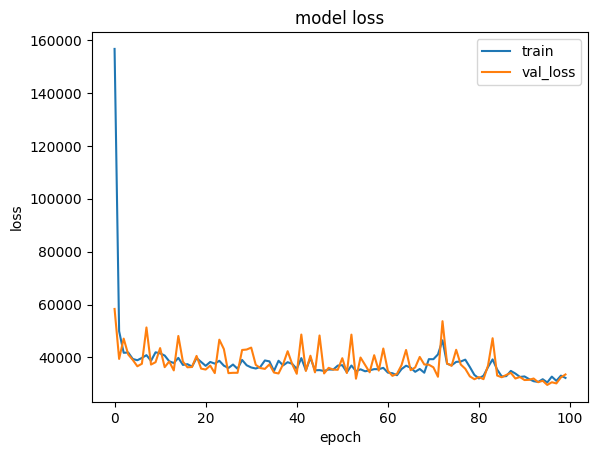

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

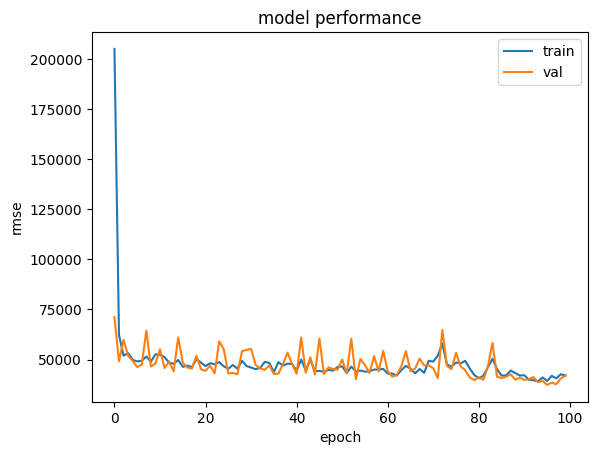

In [33]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [34]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 47962.0000 - root_mean_squared_error: 57972.5273


[47962.0, 57972.52734375]